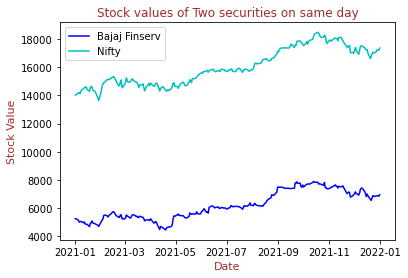

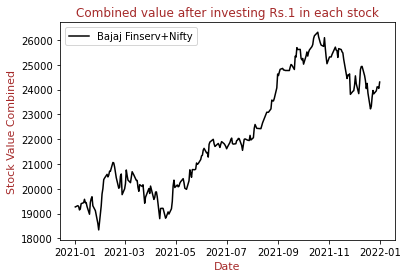

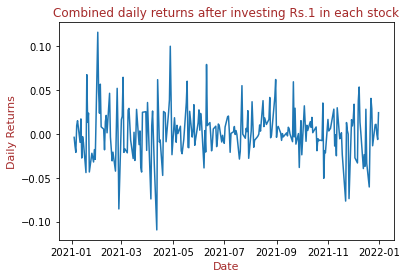

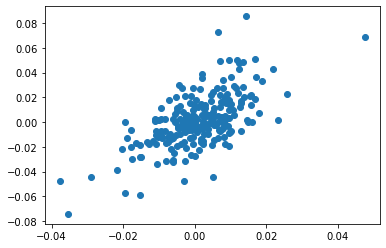

Actual Return 0.10730413881615679
Expected Return 0.7951302896712054
Error is 0.6878261508550486


In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
import pandas_datareader as pdr
from scipy import stats

start_date =datetime.datetime(2021,1,1)
end_date =datetime.datetime(2022,1,1)

fig,ax=plt.subplots()

data_nifty=pdr.DataReader('^NSEI', 'yahoo', start_date, end_date)
data_bajaj=pdr.DataReader('BAJFINANCE.NS', 'yahoo', start_date, end_date)

ax.set_xlabel('Date', fontsize=11, color="brown")
ax.set_ylabel('Stock Value', fontsize=11, color="brown")
plt.title('Stock values of Two securities on same day',color="brown")
plt.plot(data_bajaj["Adj Close"], color="b", label="Bajaj Finserv") #Blue graph represent stock value of Bajaj Finserrv
plt.plot(data_nifty["Adj Close"], color= "c",label="Nifty") #Cyan graph represent stock value of Nifty
plt.legend()

fig,ax=plt.subplots()

data_combined=data_nifty["Adj Close"]+data_bajaj["Adj Close"]
ax.set_xlabel('Date', fontsize=11, color="brown")
ax.set_ylabel('Stock Value Combined', fontsize=11, color="brown")
plt.title('Combined value after investing Rs.1 in each stock',color="brown")
plt.plot(data_combined, color="black",label="Bajaj Finserv+Nifty")
plt.legend()

fig,ax=plt.subplots()

nifty_daily_returns=(data_nifty['Adj Close']/ data_nifty['Adj Close'].shift(1)) -1
bajaj_daily_returns=(data_bajaj['Adj Close']/data_bajaj['Adj Close'].shift(1)) -1
ax.set_xlabel('Date', fontsize=11, color="brown")
ax.set_ylabel('Daily Returns', fontsize=11, color="brown")
plt.title('Combined daily returns after investing Rs.1 in each stock',color="brown")
combined_daily_returns=nifty_daily_returns+bajaj_daily_returns
plt.plot(combined_daily_returns,label="Bajaj Finserv+Nifty")
plt.show()

plt.scatter(nifty_daily_returns,bajaj_daily_returns)
plt.show()

reg_values=stats.linregress(bajaj_daily_returns[1:],nifty_daily_returns[1:])
beta,alpha,r_val,p_val,std_err = reg_values
#Finding the price on 17 May 2022
fix_date = datetime.datetime(2022,5,17)

end_price_bajaj=data_bajaj.iloc[-1].at['Adj Close']
fix_price_bajaj = pdr.DataReader('BAJFINANCE.NS','yahoo',fix_date,fix_date).iloc[0].at['Adj Close']
start_price_bajaj=pdr.DataReader('BAJFINANCE.NS', 'yahoo', start_date, start_date).iloc[0].at['Adj Close']

actual_return_bajaj=((fix_price_bajaj-start_price_bajaj)/start_price_bajaj)
expected_return_bajaj=1+beta*(((end_price_bajaj-start_price_bajaj)/start_price_bajaj)-1)
print("Actual Return", actual_return_bajaj)
print("Expected Return", expected_return_bajaj)
print("Error is", expected_return_bajaj-actual_return_bajaj)